<a href="https://colab.research.google.com/github/inesdarosa/Series_temporales/blob/main/ancapC7_con_Bidirectional_LSTM_multivariate_horizon_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
 
files.upload()

In [10]:
dataset = pd.read_csv('indep_dep.csv', header=0, index_col=0)

In [11]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [12]:
dataset.head()

,TimeStamp,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,tdc_phd.li_21018,tdc_phd.lic_21022,tdc_phd.fic_21018,tdc_phd.fic_24002,tdc_phd.fi_21019,tdc_phd.fic_22001,tdc_phd.fi_21020,Contenido_C7_Total
Fecha,,,,,,,,,,,,,,,,,,,
2017-11-13,2017-11-13,0.819295,0.826364,0.847221,100.932207,73.509561,42.189785,148.222538,134.299978,134.298269,143.105454,66.647978,70.052510,34.853391,20.170706,3.434802,40.001154,9.294360,1.58
2017-11-14,2017-11-14,0.801170,0.812762,0.825702,87.206888,73.730517,37.371204,152.319098,134.663371,134.663521,145.053458,67.347147,70.240979,29.438279,3.635455,10.521894,28.176103,8.376362,0.87
2017-11-16,2017-11-16,0.826219,0.838026,0.854918,104.310466,76.664024,33.994632,151.200238,134.382160,134.381825,147.355394,65.485162,74.979803,38.995666,16.691236,0.561110,40.000251,8.054052,1.29
2017-11-17,2017-11-17,0.833356,0.840347,0.860223,103.906107,79.025281,35.451903,149.734197,134.969764,134.970762,146.560959,75.282022,75.058140,39.863375,19.800107,1.078201,40.001630,4.365032,1.90
2017-11-19,2017-11-19,0.794647,0.835320,0.824547,98.335235,76.613032,32.870264,149.690790,134.991420,134.989959,146.505432,68.290068,74.845552,44.011026,22.179107,1.087623,39.999506,1.545024,0.68


In [13]:
dataset.dtypes

TimeStamp              object
tdc_phd.pi_21030      float64
tdc_phd.pic_21034     float64
tdc_phd.pi_21035      float64
tdc_phd.ti_21046      float64
tdc_phd.tic_21047     float64
tdc_phd.ti_21048      float64
tdc_phd.ti_21050      float64
tdc_phd.ti_21049      float64
tdc_phd.tic_21051     float64
tdc_phd.ti_21052      float64
tdc_phd.li_21018      float64
tdc_phd.lic_21022     float64
tdc_phd.fic_21018     float64
tdc_phd.fic_24002     float64
tdc_phd.fi_21019      float64
tdc_phd.fic_22001     float64
tdc_phd.fi_21020      float64
Contenido_C7_Total    float64
dtype: object

In [15]:
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'])
dataset.head()
dataset['TimeStamp'].dtype

dtype('<M8[ns]')

In [8]:
# estoy usando código sacado de:https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/
# y de acá que es lo mismo: https://colab.research.google.com/drive/1SGsU5jyuJVodUwAhf3Budeyh7c-gHXOR?usp=sharing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [17]:
plt.figure(figsize=(16,9))
fig = px.line(dataset, x=dataset.TimeStamp, y='Contenido_C7_Total', title='C7')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

<Figure size 1152x648 with 0 Axes>

In [18]:
dataset.describe()

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,tdc_phd.li_21018,tdc_phd.lic_21022,tdc_phd.fic_21018,tdc_phd.fic_24002,tdc_phd.fi_21019,tdc_phd.fic_22001,tdc_phd.fi_21020,Contenido_C7_Total
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.810829,0.829989,0.882999,97.926063,75.804256,40.652787,144.461427,131.865238,131.870268,141.698184,71.907808,74.340123,48.926258,26.126078,0.375538,43.712957,1.622621,1.719235
std,0.028851,0.017268,0.042495,5.107069,1.976677,5.480166,4.715175,3.569158,3.567766,4.568193,2.724440,1.454699,4.207656,3.874213,1.153527,4.684966,3.023889,1.169096
min,0.434158,0.488548,0.434534,51.334193,49.297990,23.318909,93.145112,77.431264,77.437917,85.753858,40.245510,64.797675,28.982674,3.542542,0.059040,15.929009,0.000000,0.001000
25%,0.803689,0.830937,0.858744,95.461959,74.832206,37.281955,142.285976,131.207725,131.209941,139.877423,70.807261,73.706066,46.487789,23.348896,0.105701,40.000654,0.016985,1.050000
50%,0.816482,0.831980,0.869900,98.379395,75.899084,40.305127,144.692893,132.198018,132.202026,141.991749,72.259782,74.844120,48.499470,25.926951,0.127818,42.746772,0.363580,1.390000
75%,0.822367,0.832733,0.910331,101.308097,76.910087,44.097713,146.927195,133.166657,133.166382,143.913048,73.416138,75.061224,51.904409,28.724372,0.147008,47.002525,1.835399,1.990000
max,0.979748,0.875167,1.063305,106.571793,80.404688,61.300977,155.347608,135.954713,135.954802,151.333427,78.980352,80.230948,70.520948,36.103453,22.689275,59.999437,33.648222,13.930000


In [19]:
dataset.drop_duplicates(subset=['TimeStamp'], keep=False,inplace=True)
dataset.drop(['TimeStamp'],axis=1,inplace=True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 2017-11-13 to 2020-12-29
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tdc_phd.pi_21030    901 non-null    float64
 1   tdc_phd.pic_21034   901 non-null    float64
 2   tdc_phd.pi_21035    901 non-null    float64
 3   tdc_phd.ti_21046    901 non-null    float64
 4   tdc_phd.tic_21047   901 non-null    float64
 5   tdc_phd.ti_21048    901 non-null    float64
 6   tdc_phd.ti_21050    901 non-null    float64
 7   tdc_phd.ti_21049    901 non-null    float64
 8   tdc_phd.tic_21051   901 non-null    float64
 9   tdc_phd.ti_21052    901 non-null    float64
 10  tdc_phd.li_21018    901 non-null    float64
 11  tdc_phd.lic_21022   901 non-null    float64
 12  tdc_phd.fic_21018   901 non-null    float64
 13  tdc_phd.fic_24002   901 non-null    float64
 14  tdc_phd.fi_21019    901 non-null    float64
 15  tdc_phd.fic_22001   901 non-null    float64
 1

In [ ]:
# en el original, codifica las variables que son de tipo objeto para poder hacer cálculos, en mi caso no tengo ese tipo de variables.

In [22]:
dataset.columns

Index(['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035',
       'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
       'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051',
       'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
       'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019',
       'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'Contenido_C7_Total'],
      dtype='object')

In [23]:
validate = dataset[['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035',
       'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
       'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051',
       'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
       'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019',
       'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'Contenido_C7_Total']].tail(10)
dataset.drop(dataset.tail(10).index,inplace=True)

In [24]:
def custom_ts_multi_data_prep(data, target, start, end, window, horizon):#en el código original dice dataset, yo lo cambio por data porque sino queda con el nombre de mi archivo
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(data) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(data[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [25]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(dataset[['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035',
       'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
       'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051',
       'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
       'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019',
       'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'Contenido_C7_Total']])
Y_data = Y_scaler.fit_transform(dataset[['Contenido_C7_Total']])

In [26]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 400
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [ ]:
x_train

In [28]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[7.05909128e-01 8.73770542e-01 6.56338704e-01 8.97903129e-01
  7.78339478e-01 4.96836447e-01 8.85453636e-01 9.71725268e-01
  9.71691357e-01 8.74534497e-01 6.81620628e-01 3.40487417e-01
  1.41332712e-01 5.10678704e-01 1.49170415e-01 5.46219892e-01
  2.76221437e-01 1.13360615e-01]
 [6.72688705e-01 8.38586906e-01 6.22114134e-01 6.49425300e-01
  7.85442636e-01 3.69971814e-01 9.51312084e-01 9.77934629e-01
  9.77933189e-01 9.04238940e-01 6.99670767e-01 3.52699272e-01
  1.09683224e-02 2.85350412e-03 4.62339591e-01 2.77898221e-01
  2.48939216e-01 6.23878240e-02]
 [7.18600218e-01 9.03933207e-01 6.68580188e-01 9.59061819e-01
  8.79747314e-01 2.81072728e-01 9.33324710e-01 9.73129525e-01
  9.73119253e-01 9.39340361e-01 6.51600750e-01 6.59751736e-01
  2.41054615e-01 4.03818367e-01 2.21857865e-02 5.46199407e-01
  2.39360399e-01 9.25407423e-02]
 [7.31681850e-01 9.09938028e-01 6.77017613e-01 9.51741464e-01
  9.55655606e-01 3.19440053e-01 9.09755860e-01 9.83170009e-01


In [29]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [30]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')

In [31]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 20, 400)          350400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 20, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [32]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [34]:
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 45s 448ms/step - loss: 0.0031 - val_loss: 0.0096
Epoch 2/50
100/100 [==============================] - 45s 451ms/step - loss: 0.0030 - val_loss: 0.0097
Epoch 3/50
100/100 [==============================] - 45s 452ms/step - loss: 0.0029 - val_loss: 0.0100
Epoch 4/50
100/100 [==============================] - 45s 452ms/step - loss: 0.0029 - val_loss: 0.0099
Epoch 5/50
100/100 [==============================] - 45s 447ms/step - loss: 0.0028 - val_loss: 0.0100
Epoch 6/50
100/100 [==============================] - 45s 448ms/step - loss: 0.0028 - val_loss: 0.0100
Epoch 7/50
100/100 [==============================] - 45s 451ms/step - loss: 0.0027 - val_loss: 0.0108
Epoch 8/50
100/100 [==============================] - 45s 452ms/step - loss: 0.0026 - val_loss: 0.0109
Epoch 9/50
100/100 [==============================] - 45s 451ms/step - loss: 0.0025 - val_loss: 0.0112
Epoch 10/50
100/100 [==============================] - 45s 452ms/step - l

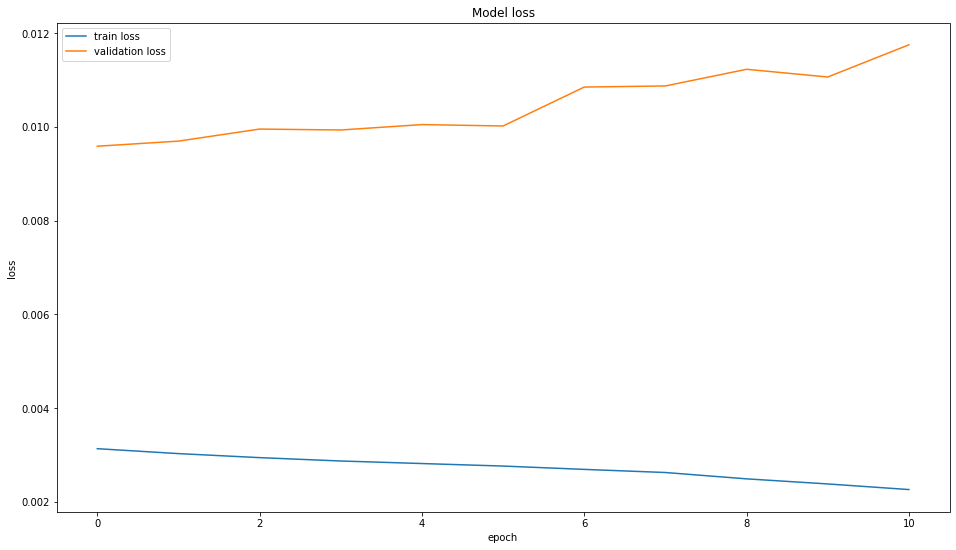

In [35]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [37]:
dataset.columns

Index(['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035',
       'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
       'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051',
       'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
       'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019',
       'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'Contenido_C7_Total'],
      dtype='object')

In [39]:
data_val = X_scaler.fit_transform(dataset[['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035',
       'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
       'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051',
       'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
       'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019',
       'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'Contenido_C7_Total']].tail(20))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [40]:
pred = lstm_model.predict(val_rescaled)
pred

1/1 [==============================] - 2s 2s/step


array([[ 0.11284664,  0.04798884, -0.01040123, -0.06359242, -0.04073893,
        -0.03139695, -0.04150893, -0.03704208,  0.04852002,  0.0844818 ]],
      dtype=float32)

In [41]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [42]:
pred_Inverse

array([[ 1.5728408 ,  0.6694366 , -0.14387868, -0.8847788 , -0.5664525 ,
        -0.43632808, -0.5771778 , -0.51495916,  0.6768354 ,  1.177747  ]],
      dtype=float32)

In [43]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [44]:
pred_Inverse[0]

array([ 1.5728408 ,  0.6694366 , -0.14387868, -0.8847788 , -0.5664525 ,
       -0.43632808, -0.5771778 , -0.51495916,  0.6768354 ,  1.177747  ],
      dtype=float32)

In [45]:
timeseries_evaluation_metrics_func(validate['Contenido_C7_Total'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 2.9239579743342077
MAE is : 1.4267890875935554
RMSE is : 1.709958471523273
MAPE is : 94.01678452561642
R2 is : -11.711534337000526



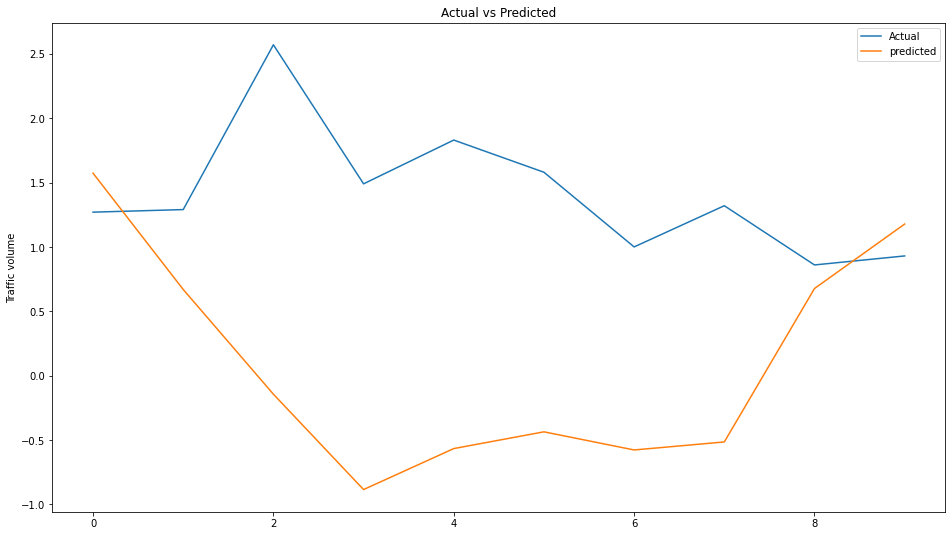

In [46]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Contenido_C7_Total']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Traffic volume")
plt.legend(('Actual','predicted'))
plt.show()